# Jupyter Notebook Exercise

Download `bicycling.csv`, `auto-mpg.csv`, `first_example.ipynb`, and `random_number_scatter_plots.ipynb`.

Saving these files in the same location on your computer.  Open the notebook files (they have the .ipynb extensions) up in a jupyter notebook.  Play around with each of them (run cells, change things and rerun the cells, etc.) for a bit and then create a new jupyter notebook that

1. Shows a nicely labeled plot of $f(x) = e^{-x/10}\sin x$ on the interval $[-10,50]$.
2. Shows a plot of 100 randomly generated points in the domain with bounds $0 \leq x \leq 8$ and $-5 \leq y \leq 5$.
3. Reads and examines the data in `auto-mpg.csv` and then
    * show a correctly labeled scatter plot of horsepower (vertical axis) vs weight (horizontal axis).  Based on your plot, does it appear that horsepower is positively or negatively correlated with vehicle weight?  (Look up what "positive correlation" if you need to).
    * show a correctly labeled scatter plot of weight vs model year.  Based on your plot, do you see a trend in vehicle weight over time?  If so, how would you describe it?

**What to turn in:** Create a PDF of your finished notebook (from your web browser, print a copy of the notebook to PDF) and submit it.

First, we'll import the Python packages we need and configure matplotlib so the figures we produce will appear in the notebook rather than in separate windows.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Next we generate the data for the sine graph.  We want to be sure to include both endpoints, which requires a little fiddling when using the `np.arange()` function.

In [2]:
x = np.linspace(-10, 50, 601)  # could also use x = np.arange(-10, 50.1, 0.1)
y = np.exp(-x/10) * np.sin(x)

Now we can produce the plot

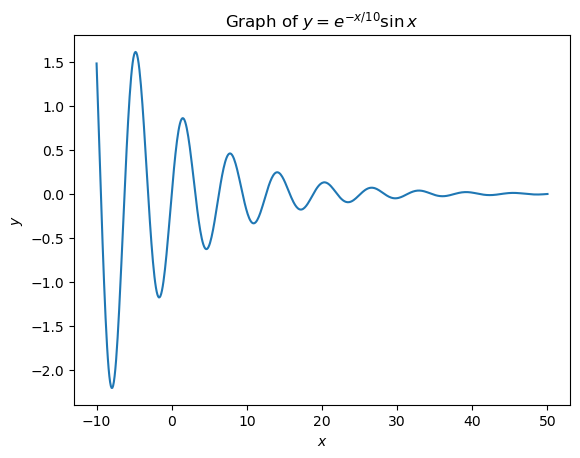

In [3]:
plt.plot(x, y)
plt.xlabel('$x$') # The dollar signs toggle math (LaTeX) mode
plt.ylabel('$y$')
plt.title('Graph of $y = e^{-x/10} \sin x$')
plt.show()

In [4]:
len(x)

601

## Practice working with pandas

In [5]:
import pandas as pd  # We could have included this at the top in the preamble cell...

In [6]:
df = pd.read_csv('../Auto_MPG/auto-mpg.csv')

Get general information about the dataframe and see the first five records

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [8]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [9]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


To select a column (a single attribute), we can use the column label as an index (like a Python dictorionary):

In [10]:
df['displacement']

0      307.0
1      350.0
2      318.0
3      304.0
4      302.0
       ...  
393    140.0
394     97.0
395    135.0
396    120.0
397    119.0
Name: displacement, Length: 398, dtype: float64

Since we can select individual attribute columns, it is easy to produce scatter plots:

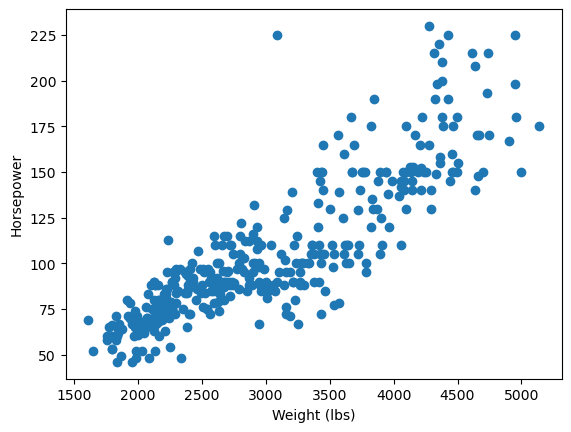

In [11]:
plt.scatter(df['weight'], df['horsepower'])
plt.xlabel('Weight (lbs)')
plt.ylabel('Horsepower')
plt.show()

From the above plot, it appears that horsepower and weight are positively correlated and the relationship is close to linear.

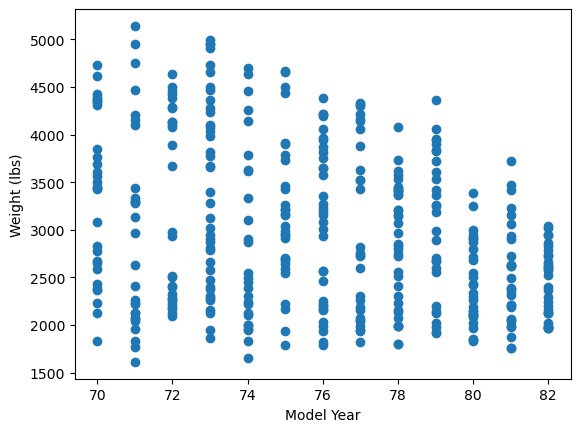

In [12]:
plt.scatter(df['model year'], df['weight'])
plt.xlabel('Model Year')
plt.ylabel('Weight (lbs)')
plt.show()

From the plot above, it appears that the minimum vehicle weight does not change much, but the maximum weights do decline over the years. Thus, the average vehicle weight is decreasing from 1970 to 1982.